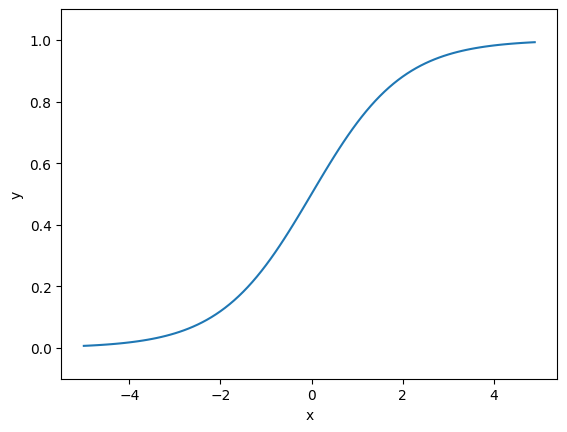

In [2]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.xlabel("x") # x軸のラベル
plt.ylabel("y") # y軸のラベル
plt.show()

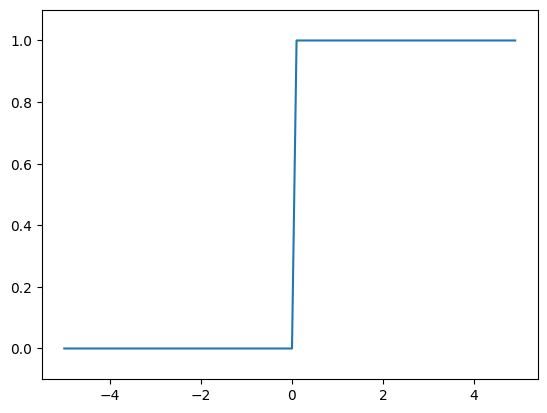

In [6]:
# coding: utf-8

# 阶跃函数

import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int_)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()


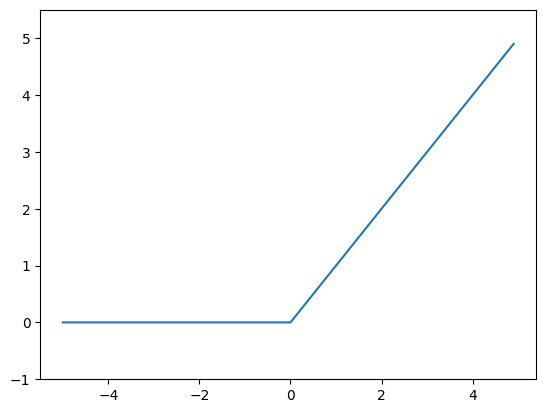

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

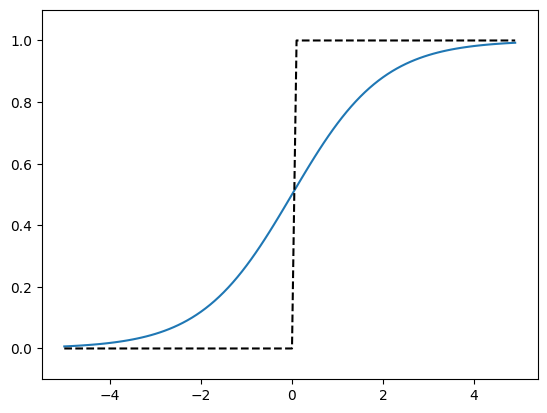

In [9]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int_)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #図で描画するy軸の範囲を指定
plt.show()


In [17]:
import os
import sys
# current_path = os.path.dirname(os.path.abspath(__file__))

# project_path = os.path.abspath(os.path.join(current_path, os.pardir))


# print(current_path)

# print(project_path)


print(sys.path[0])
project_path = sys.path[0]

print(project_path)


/home/intel/suhao/deep-learning-from-scratch
/home/intel/suhao/deep-learning-from-scratch


In [23]:

'''
多维数组的运算


'''

A = np.array([1, 2, 3, 4])

print(A)

[1 2 3 4]


In [19]:

# 数组的维数可以通过np.dim()函数获得

np.ndim(A)

1

In [24]:

# 数组的形状可以通过实例变量shape获得

# 注意，这里的A.shape的结果是个元组（tuple）。这是因为一维数组的
# 情况下也要返回和多维数组的情况下一致的结果。

A.shape

(4,)

In [32]:

# 二维数组

B = np.array([[1,2], [3,4], [5,6]])

print(B)

print()

print (np.ndim(B))

print()

print(B.shape)

[[1 2]
 [3 4]
 [5 6]]

2

(3, 2)


In [36]:

# 矩阵乘法
'''
1  2         5  6      19  22
3  4   dot   7  8  ==  43  50

1x5 + 2x7 == 19
'''

A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print (B.shape)
np.dot(A,B)



(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [46]:

# 神经网络的内积

'''
             1  3  5      
1  2   dot   2  4  6  ==  5  11  17
'''


X = np.array([1, 2])

print(X)

X.shape

[1 2]


(2,)

In [43]:

W = np.array([[1, 3, 5], [2, 4, 6]])

print(W)

W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [45]:
Y = np.dot(X, W)

print(Y)

[ 5 11 17]


(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


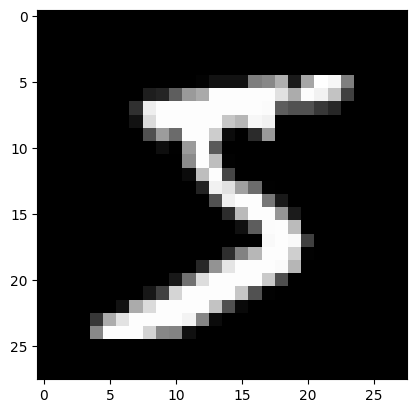

In [57]:

# 手写数字识别

'''
# load_mnist函数以“(训练图像 ,训练标签 ), (测试图像，测试标签 )”的
形式返回读入的MNIST数据。 

'''


import sys, os
from dataset.mnist import load_mnist
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

'''
x_train 是数据集中拿来训练的输入
t_train 是数据集中拿来训练的正确答案

x_test  是数据集中拿来验证模型的输入
t_test  是验证模型的正确答案
'''


print(x_train.shape)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img, cmap='gray')
    # pil_img.show()

img_show(img)

In [63]:
# 神经网络的推理处理

import pickle


def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

accuracy_cnt = 0


for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
        

Accuracy:0.9352


In [ ]:
# 批处理

'''
原来 x 是一个一个输入，批处理可以将 x 改为 10 个 10 个输入，
一次性处理 10 个输入，计算出 10 个结果

'''


